In [30]:
import pandas as pd

In [31]:
df = pd.read_csv("data/heart.csv")

In [32]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [33]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [34]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [36]:
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score

In [37]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [38]:
df.shape

(1025, 14)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [40]:
selected_columns = df[["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang"]]


In [41]:
df1 = selected_columns.copy()

In [42]:
df1.info

<bound method DataFrame.info of       age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang
0      52    1   0       125   212    0        1      168      0
1      53    1   0       140   203    1        0      155      1
2      70    1   0       145   174    0        1      125      1
3      61    1   0       148   203    0        1      161      0
4      62    0   0       138   294    1        1      106      0
...   ...  ...  ..       ...   ...  ...      ...      ...    ...
1020   59    1   1       140   221    0        1      164      1
1021   60    1   0       125   258    0        0      141      1
1022   47    1   0       110   275    0        0      118      1
1023   50    0   0       110   254    0        0      159      0
1024   54    1   0       120   188    0        1      113      0

[1025 rows x 9 columns]>

In [43]:
 df1.drop('fbs',axis='columns')

,age,sex,cp,trestbps,chol,restecg,thalach,exang
0,52,1,0,125,212,1,168,0
1,53,1,0,140,203,0,155,1
2,70,1,0,145,174,1,125,1
3,61,1,0,148,203,1,161,0
4,62,0,0,138,294,1,106,0
...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,1,164,1
1021,60,1,0,125,258,0,141,1
1022,47,1,0,110,275,0,118,1
1023,50,0,0,110,254,0,159,0


In [44]:
df1

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang
0,52,1,0,125,212,0,1,168,0
1,53,1,0,140,203,1,0,155,1
2,70,1,0,145,174,0,1,125,1
3,61,1,0,148,203,0,1,161,0
4,62,0,0,138,294,1,1,106,0
...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1
1021,60,1,0,125,258,0,0,141,1
1022,47,1,0,110,275,0,0,118,1
1023,50,0,0,110,254,0,0,159,0


<Axes: ylabel='target'>

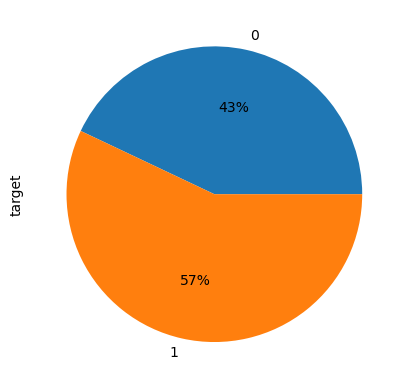

In [45]:
df.groupby('sex')['target'].sum().plot.pie(autopct='%1.0f%%')


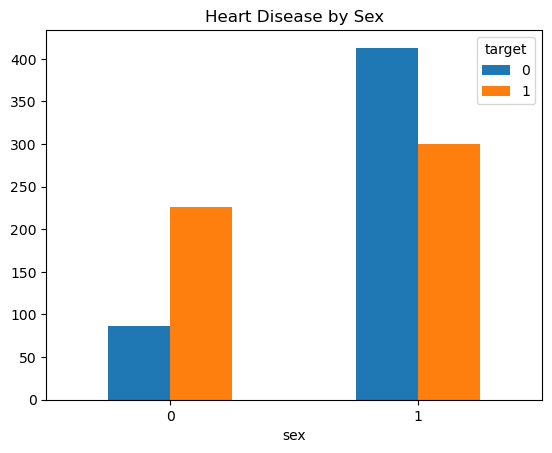

In [46]:
pd.crosstab(df['sex'], df['target']).plot.bar()
plt.title('Heart Disease by Sex')
plt.xticks(rotation=0)
plt.show()


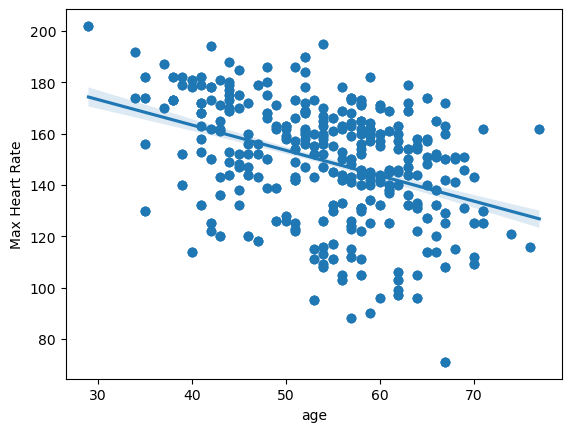

In [47]:
sns.regplot(
    data=df1,
    x='age',
    y='thalach',
)
plt.ylabel('Max Heart Rate')
plt.show()


In [48]:
df1.cp.unique()

array([0, 1, 2, 3], dtype=int64)

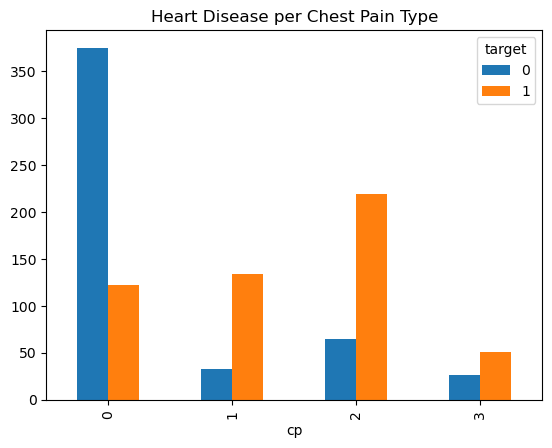

In [49]:
pd.crosstab(df['cp'], df['target']).plot.bar()
plt.title('Heart Disease per Chest Pain Type')
plt.show()


In [50]:
df1.cp.value_counts()

cp
0    497
2    284
1    167
3     77
Name: count, dtype: int64

In [51]:
print(df1.columns)

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang'],
      dtype='object')


In [52]:
selected_columns = df[["target"]]
x1 = selected_columns.copy()
x1


,target
0,0
1,0
2,0
3,0
4,0
...,...
1020,1
1021,0
1022,0
1023,1


In [53]:
x = df[["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang"]]

In [54]:
X_train, X_test, y_train, y_test = train_test_split(x, x1, test_size=0.2, random_state=42, shuffle=True)

In [55]:
X_train.shape, y_train.shape

((820, 9), (820, 1))

In [56]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang
835,49,1,2,118,149,0,0,126,0
137,64,0,0,180,325,0,1,154,1
534,54,0,2,108,267,0,0,167,0
495,59,1,0,135,234,0,1,161,0
244,51,1,2,125,245,1,0,166,0
...,...,...,...,...,...,...,...,...,...
700,41,1,2,130,214,0,0,168,0
71,61,1,0,140,207,0,0,138,1
106,51,1,0,140,299,0,1,173,1
270,43,1,0,110,211,0,1,161,0


In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

models = {
    'logistic_reg': LogisticRegression(),
    'KNN_clf': KNeighborsClassifier(),
    'randf_clf': RandomForestClassifier()
}


In [58]:
models

{'logistic_reg': LogisticRegression(),
 'KNN_clf': KNeighborsClassifier(),
 'randf_clf': RandomForestClassifier()}

In [59]:
def fit_models_score(models, X_train, y_train, X_test, y_test):
    np.random.seed(42)

    model_scores={}
    for name, model in models.items():
        model.fit(X_train, y_train)
        model_scores[name] = round(model.score(X_test, y_test),5)

    return model_scores

In [60]:
fit_models_score(models, X_train, y_train, X_test, y_test)

c:\Users\tusha\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\tusha\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\tusha\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exa

{'logistic_reg': 0.79512, 'KNN_clf': 0.73171, 'randf_clf': 0.98537}

In [61]:
#confusion matrix, 100 overfit,heatmap, logistic reg, confusion matrix

<Axes: >

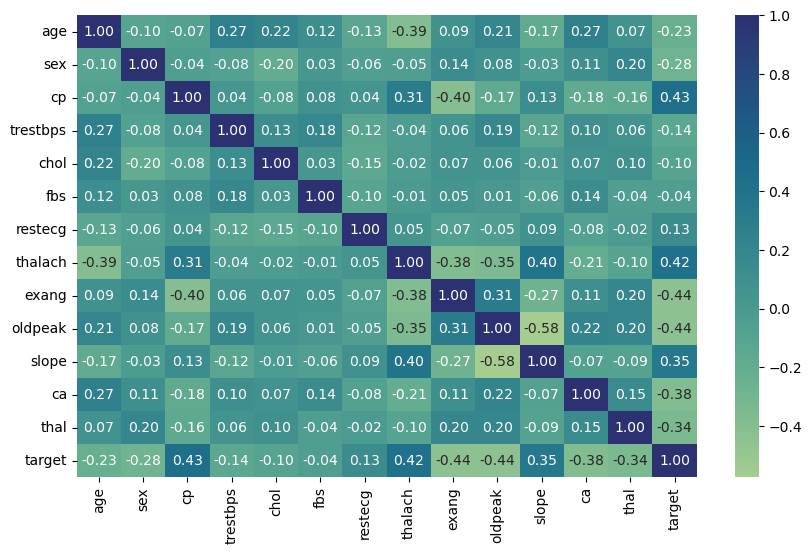

In [62]:
fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(df.corr(), cmap='crest',  annot=True, fmt='.2f')


In [63]:
from sklearn.preprocessing import StandardScaler

# from sklearn.metrics import confusion_matrix
# cm = confusion_matrix(X_train,y_train)

In [64]:
std_sc = StandardScaler()
X_train_sc = std_sc.fit_transform(X_train)
X_test_sc = std_sc.fit_transform(X_test)

In [65]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
train_score = []
test_score = []
n = range(1, 21) # find n at range 1-20

for i in n:
#     knn.set_params(n_neighbors=i)
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_sc, y_train)

    train_score.append(knn.score(X_train_sc,y_train))
    test_score.append(knn.score(X_test_sc,y_test))

c:\Users\tusha\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\tusha\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\tusha\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\tusha\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

In [66]:
sc =fit_models_score(models, X_train_sc, y_train, X_test_sc, y_test)


c:\Users\tusha\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\tusha\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


c:\Users\tusha\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [67]:
sc

{'logistic_reg': 0.79024, 'KNN_clf': 0.81951, 'randf_clf': 0.97561}

In [68]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
grid_tune = {'logistic_reg': 0, 'KNN_clf': 0.90164, 'randf_clf': 0}

In [69]:
log_reg_set = {
    'C': np.logspace(-4, 4, 30),
    'solver': ['liblinear']
}

grid_s_log = GridSearchCV(
    LogisticRegression(),
    log_reg_set,
    cv=5,
    verbose=2,
)
# there's no iter here cuz GridSearch run all parameters
# 30 * 5 = 150 fits

grid_s_log.fit(X_train_sc, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00018873918221350977, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00018873918221350977, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00018873918221350977, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00018873918221350977, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00018873918221350977, solver=liblinear; total time=   0.0s
[CV] END ..........C=0.0003562247890262444, solver=liblinear; total time=   0.0s
[CV] END ..........C=0.0003562247890262444, sol

c:\Users\tusha\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\tusha\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\tusha\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\tusha\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

[CV] END ...........C=0.008531678524172805, solver=liblinear; total time=   0.0s
[CV] END ...........C=0.008531678524172805, solver=liblinear; total time=   0.0s
[CV] END ...........C=0.008531678524172805, solver=liblinear; total time=   0.0s
[CV] END ...........C=0.008531678524172805, solver=liblinear; total time=   0.0s
[CV] END ............C=0.01610262027560939, solver=liblinear; total time=   0.0s
[CV] END ............C=0.01610262027560939, solver=liblinear; total time=   0.0s
[CV] END ............C=0.01610262027560939, solver=liblinear; total time=   0.0s
[CV] END ............C=0.01610262027560939, solver=liblinear; total time=   0.0s
[CV] END ............C=0.01610262027560939, solver=liblinear; total time=   0.0s
[CV] END ............C=0.03039195382313198, solver=liblinear; total time=   0.0s
[CV] END ............C=0.03039195382313198, solver=liblinear; total time=   0.0s
[CV] END ............C=0.03039195382313198, solver=liblinear; total time=   0.0s
[CV] END ............C=0.030

c:\Users\tusha\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\tusha\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\tusha\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\tusha\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

[CV] END .............C=0.7278953843983146, solver=liblinear; total time=   0.0s
[CV] END .............C=0.7278953843983146, solver=liblinear; total time=   0.0s
[CV] END .............C=1.3738237958832638, solver=liblinear; total time=   0.0s
[CV] END .............C=1.3738237958832638, solver=liblinear; total time=   0.0s
[CV] END .............C=1.3738237958832638, solver=liblinear; total time=   0.0s
[CV] END .............C=1.3738237958832638, solver=liblinear; total time=   0.0s
[CV] END .............C=1.3738237958832638, solver=liblinear; total time=   0.0s
[CV] END ..............C=2.592943797404667, solver=liblinear; total time=   0.0s
[CV] END ..............C=2.592943797404667, solver=liblinear; total time=   0.0s
[CV] END ..............C=2.592943797404667, solver=liblinear; total time=   0.0s
[CV] END ..............C=2.592943797404667, solver=liblinear; total time=   0.0s
[CV] END ..............C=2.592943797404667, solver=liblinear; total time=   0.0s
[CV] END ..............C=4.8

c:\Users\tusha\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\tusha\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\tusha\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\tusha\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

[CV] END ..............C=62.10169418915616, solver=liblinear; total time=   0.0s
[CV] END ..............C=62.10169418915616, solver=liblinear; total time=   0.0s
[CV] END ..............C=62.10169418915616, solver=liblinear; total time=   0.0s
[CV] END ..............C=62.10169418915616, solver=liblinear; total time=   0.0s
[CV] END .............C=117.21022975334793, solver=liblinear; total time=   0.0s
[CV] END .............C=117.21022975334793, solver=liblinear; total time=   0.0s
[CV] END .............C=117.21022975334793, solver=liblinear; total time=   0.0s
[CV] END .............C=117.21022975334793, solver=liblinear; total time=   0.0s
[CV] END .............C=117.21022975334793, solver=liblinear; total time=   0.0s
[CV] END .............C=221.22162910704503, solver=liblinear; total time=   0.0s
[CV] END .............C=221.22162910704503, solver=liblinear; total time=   0.0s
[CV] END .............C=221.22162910704503, solver=liblinear; total time=   0.0s
[CV] END .............C=221.

c:\Users\tusha\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\tusha\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\tusha\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\tusha\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=2)

In [70]:
tune_grid_log = LogisticRegression(
    C=grid_s_log.best_params_['C'],
    solver=grid_s_log.best_params_['solver'],
)
tune_grid_log.fit(X_train_sc, y_train)
grid_tune['logistic_reg']=round(tune_grid_log.score(X_test_sc, y_test), 4)
tune_grid_log.score(X_test_sc, y_test)

c:\Users\tusha\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8

In [71]:
y_pred = tune_grid_log.predict(X_test_sc)
y_pred

array([1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1], dtype=int64)

In [72]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

In [73]:
confusion_matrix(y_test, y_pred)

array([[74, 28],
       [13, 90]], dtype=int64)

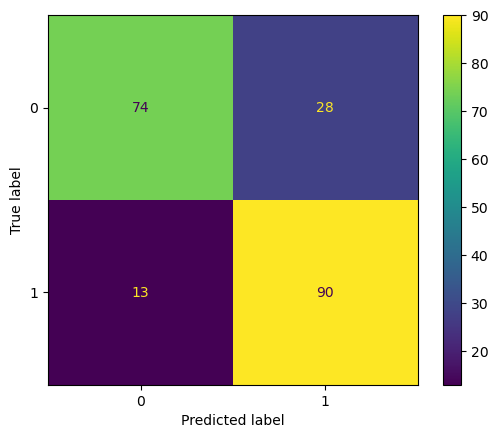

In [74]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot();

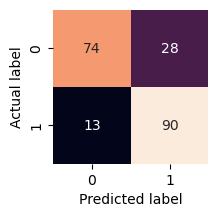

In [75]:
fig, ax = plt.subplots(figsize=(2,2))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cbar=False, ax=ax)
ax.set_xlabel('Predicted label')
ax.set_ylabel('Actual label');